# Homework 0

在Homework 0中，我们给出了一个用以帮助你学习如何使用pytorch进行神经网络训练的基础例子，该例子在MNIST数据集上训练一个神经网络用来识别图片中的数字是什么。

Homework 0 共分成两部分，在第一部分中，我们给出了完整的训练代码和测试代码，在第二部分中，我们基于第一部分提供了一个小练习，在该练习中，你需要填写部分代码以成功训练出一个可以识别数字的神经网络。

请同学们好好享受并使用Homework 0中的内容！

## 第一部分

PyTorch 的基础可以参考 <https://pytorch.org/tutorials/beginner/basics/intro.html>。如果没有 PyTorch 基础，建议从其中第一节 Tensors 开始看起，跳过第 0 节 Quickstart。

你需要在 MNIST 数据集上训练一个神经网络，进行手写数字识别。我们已经在下面给出了代码，你需要尝试运行并理解训练流程。

### 设置超参数(Hyperparameters)

In [1]:
num_epochs = 10
batch_size = 1024
device = 'cuda'

### 加载数据集

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST('data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9.91M/9.91M [00:08<00:00, 1.22MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 173kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.13MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.27MB/s]


### 定义模型

In [ ]:
from torch import nn
from torch.functional import F
class MNISTModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 10)
  def forward(self, x):
    bsz = x.shape[0]
    x = x.view(bsz, -1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x

### 初始化模型和优化器

In [ ]:
from torch import optim
model = MNISTModel()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

### 训练

In [ ]:
import numpy as np
from tqdm import tqdm
model.train()
for i in range(num_epochs):
  losses = []
  with tqdm(train_loader) as pbar:
    for batch_idx, (data, target) in enumerate(pbar):
      data = data.to(device)
      target = target.to(device)
      optimizer.zero_grad()
      output = model(data)
      loss = F.cross_entropy(output, target)
      losses.append(loss.item())
      loss.backward()
      optimizer.step()

      pbar.set_description('Epoch: {} Loss: {:.4f}'.format(i, np.mean(losses[-100:])))

### 测试
在测试集上测试模型的准确率，如果一切正常，模型的准确率应该在 90\% 以上。

In [ ]:
import torch
model.eval()
results = []
with torch.no_grad():
  with tqdm(test_loader) as pbar:
    for batch_idx, (data, target) in enumerate(pbar):
      data = data.to(device)
      target = target.to(device)
      output = model(data)
      pred = output.argmax(dim=1)
      result = pred == target
      results.extend(result.tolist())

      pbar.set_description('Test Acc: {:.4f}'.format(np.mean(results)))

### 结果可视化
从数据集中随机选取一张图片，打印图片和模型预测的结果。
如果一切正常，模型预测结果应与图片上的数字一致。

In [ ]:
import random
model.eval()
data, target = random.choice(test_dataset)
data = data.to(device)
with torch.no_grad():
  output = model(data)
pred = output.argmax(dim=1).item()
print('Model prediction: {}'.format(pred))

import matplotlib.pyplot as plt
im = transforms.ToPILImage()(data * 0.1307 + 0.3081)
plt.imshow(im, cmap='gray')
plt.show()

---

## 第二部分
接下来，你需要尝试自己完成一遍上述的过程。此部分保留了大部分的代码，但留下了部分代码需要补全，你需要将标有TODO部分的代码补全并运行，期望上运行结果应该是与第一部分结果一致的。

In [3]:
# 设置超参数
num_epochs = 10
batch_size = 1024
device = 'cuda'

In [4]:
# 加载数据集
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# TODO: 加载测试集test_dataset以及test_loader
test_dataset = datasets.MNIST('data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [8]:
# 定义模型
from torch import nn
from torch.functional import F
class MNISTModel(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: 定义模型网络结构
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)
  def forward(self, x):
    # TODO: 模型进行前向传播
    bsz = x.shape[0]
    x = x.view(bsz, -1)
    x = self.fc1(x)
    x = F.gelu(x)
    x = self.fc2(x)
    x = F.gelu(x)
    x = self.fc3(x)
    return x

In [9]:
# 初始化模型和优化器
from torch import optim
model = MNISTModel()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [10]:
# 训练
import numpy as np
from tqdm import tqdm
model.train()
for i in range(num_epochs):
  losses = []
  with tqdm(train_loader) as pbar:
    for batch_idx, (data, target) in enumerate(pbar):
      # TODO: 将该批次的数据移动到 GPU 上
      data = data.to(device)
      target = target.to(device)
      # TODO: 清空模型参数的梯度
      optimizer.zero_grad()
      # TODO: 计算模型输出
      output = model(data)
      # TODO: 计算在该批次数据上的Loss
      loss = F.cross_entropy(output, target)
      losses.append(loss.item())
      # TODO: 反向传播计算梯度
      loss.backward() 
      # TODO：使用优化器更新网络参数
      optimizer.step()
      pbar.set_description('Epoch: {} Loss: {:.4f}'.format(i, np.mean(losses[-100:])))
    

Epoch: 9 Loss: 0.3216: 100%|██████████| 59/59 [00:11<00:00,  5.04it/s]


In [11]:
# 测试
import torch
model.eval()
results = []
with torch.no_grad():
  with tqdm(test_loader) as pbar:
    for batch_idx, (data, target) in enumerate(pbar):
      data = data.to(device)
      target = target.to(device)
      output = model(data)
      pred = output.argmax(dim=1)
      result = pred == target
      results.extend(result.tolist())

      pbar.set_description('Test Acc: {:.4f}'.format(np.mean(results)))

Test Acc: 0.9139: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Model prediction: 9


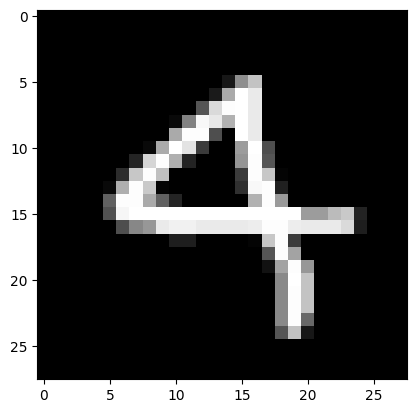

In [12]:
# 结果可视化
import random
model.eval()
data, target = random.choice(test_dataset)
data = data.to(device)
with torch.no_grad():
  output = model(data)
pred = output.argmax(dim=1).item()
print('Model prediction: {}'.format(pred))

import matplotlib.pyplot as plt
im = transforms.ToPILImage()(data * 0.1307 + 0.3081)
plt.imshow(im, cmap='gray')
plt.show()